<a href="https://colab.research.google.com/github/nilmarlanna/analise-de-sentimentos/blob/main/analise_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dataset_avaliacoes.csv')

In [ ]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [ ]:
df.shape

(15501, 4)

In [ ]:
df['sentimento'].value_counts('sentimento')

sentimento
positivo    0.508999
negativo    0.491001
Name: proportion, dtype: float64

In [ ]:
print('positiva \n')

df.avaliacao[0]

positiva 



'Esse smartphone superou minhas expectativas, recomendo'

In [ ]:
print('negativa \n')

df.avaliacao[2]

negativa 



'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
import pandas as pd

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words,
    columns=vetorizar.get_feature_names_out()
)

In [ ]:
matriz_esparsa

comprei  produto  ruim  um  ótimo
0        1        1     0   1      1
1        1        1     1   1      0

In [ ]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 23352)


In [ ]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words,
    columns=vetorizar.get_feature_names_out()
)

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_test, y_treino, y_test = train_test_split(bag_of_words, df.sentimento, random_state=4978)

In [ ]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)
acuracia = regressao_logistica.score(x_test, y_test)
print(acuracia)

0.9293085655314758


In [ ]:
from wordcloud import WordCloud

In [ ]:
todas_palavras = [texto for texto in df.avaliacao]

In [ ]:
todas_palavras

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [ ]:
todas_palavras = ' '.join([texto for texto in df.avaliacao])

In [ ]:
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

In [ ]:
nuvem_palavras = WordCloud().generate(todas_palavras)

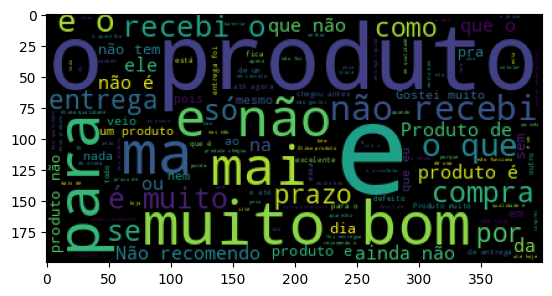

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

In [39]:
def nuvem_palavras(texto, coluna_texto, sentimento):
  # Filtrando as resenhas com base no sentimento especificado
  texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto]

  # Unindo todas as resenhas em uma única string
  texto_unido = ' '.join(texto_sentimento)

  # Criando e exibindo a nuvem de palavras
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

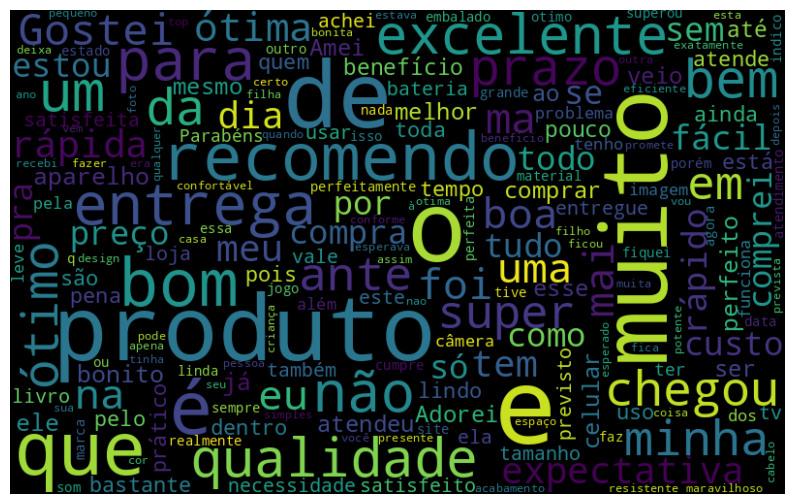

In [40]:
nuvem_palavras(df, 'avaliacao', 'positivo')

In [41]:
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

In [42]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [43]:
frases = ['um produto bom', 'um produto ruim']
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um produto bom': 1, 'um produto ruim': 1})

In [44]:
from nltk import tokenize

frase = 'O produto é excelente e a entrega foi muito rápida!'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['O', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida!']


In [45]:
token_frase = token_espaco.tokenize(todas_palavras)

In [46]:
token_frase

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu',
 'minhas',
 'expectativas,',
 'só',
 'achei',
 'a',
 'luz',
 'ruim,',
 'mas',
 'nada',
 'que',
 'dificulte',
 'seu',
 'funcionamento.',
 'Gostei',
 'muito,',
 'só',
 'achei',
 'que',
 'ficou',
 'a',
 'desejar',
 'a',
 'qualidade',
 'das',
 'fotos.',
 'Achei',
 'que',
 'fosse',
 'bem',
 'melhor',
 '.',
 'Comprei',
 'o',
 'produto',
 'e',
 'ñ',
 'tinha',
 'para',
 'entrega',
 'isso',
 'não',
 'foi',
 'legal!!!!!!',
 'o',
 'produto',
 'pode',
 'até',
 'ser',
 'bom',
 ',mais',
 'só',
 'posso',
 'avalia-lo',
 'depo

In [47]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [48]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})

In [49]:
df_frequencia.head()

Palavra  Frequência
0           Esse         101
1     smartphone          33
2        superou          90
3         minhas         533
4  expectativas,          79

In [50]:
df_frequencia.nlargest(columns='Frequência', n=10)

Palavra  Frequência
8          e       11813
6          o       10865
29        de       10280
19         a        8873
46       que        7657
22       não        7286
163        é        4786
63   produto        4765
177      com        4641
130       do        4583

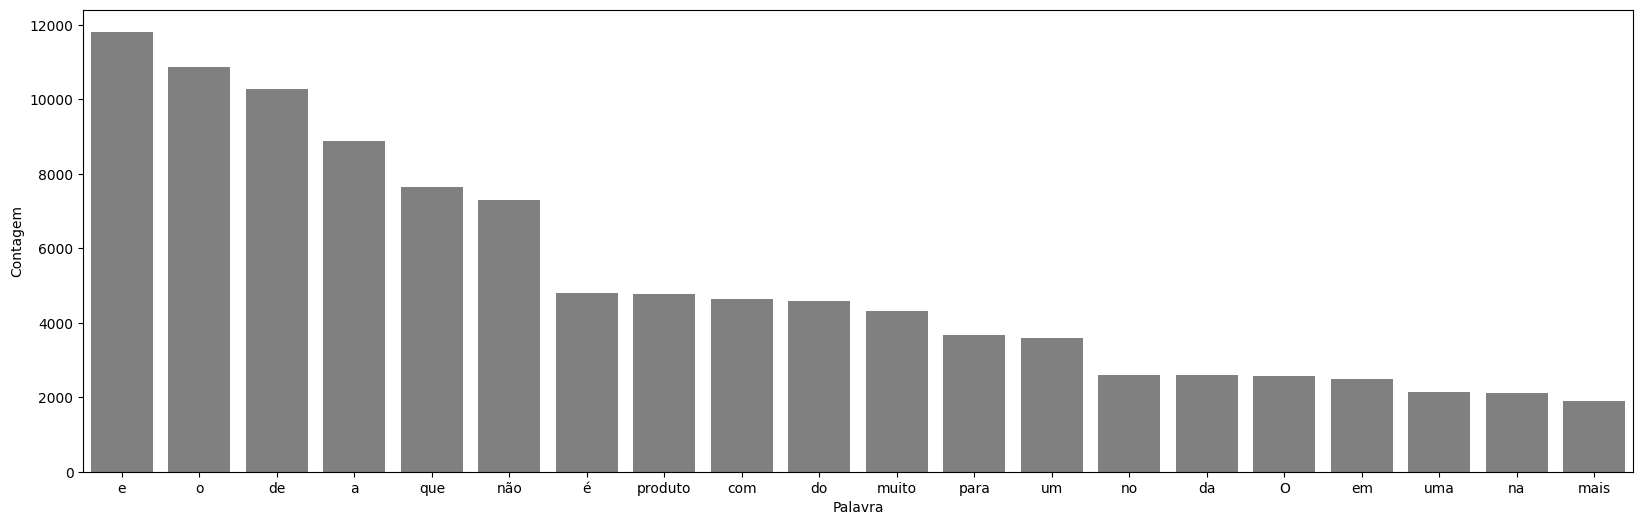

In [51]:
import seaborn as sns

plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20), x='Palavra', y='Frequência', color='gray')
ax.set(ylabel='Contagem')
plt.show()

In [52]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [53]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [62]:
frase_processada = []

for opiniao in df['avaliação']:
    palavras_texto = token_espaco.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

    df['tratamento_1'] = frase_processada

KeyError: 'avaliação'

In [61]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [59]:
df['avaliacao'][0]

'Esse smartphone superou minhas expectativas, recomendo'

In [63]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")

In [65]:
frase = 'Esse smartphone superou expectativas, recomendo'

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']


In [66]:
frase_processada = []

for opiniao in df['tratamento_1']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if
    alavra.isalpha() and palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

KeyError: 'tratamento_1'

In [67]:
print(df.head())

   ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo  


In [68]:
df['tratamento_1'][10]

KeyError: 'tratamento_1'

In [69]:
grafico_frequencia(df, 'tratamento_2', 20)

NameError: name 'grafico_frequencia' is not defined

In [70]:
! pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.9 MB/s eta 0:00:00


In [71]:
import unidecode

In [73]:
frase = 'Um aparelho ótima performance preço bem menor outros aparelhos marcas conhecidas performance semelhante'

teste = unidecode.unidecode(frase)
print(teste)

Um aparelho otima performance preco bem menor outros aparelhos marcas conhecidas performance semelhante


In [74]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['tratamento_2']]

KeyError: 'tratamento_2'

In [75]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [76]:
df['tratamento_3'] = sem_acentos

frase_processada = []

for opiniao in df['tratamento_3']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_3'] = frase_processada

NameError: name 'sem_acentos' is not defined

In [77]:
df['tratamento_2'][70]

KeyError: 'tratamento_2'

In [78]:
frase = "Bom produto otimo custo-beneficio Recomendo Confortavel bem acabado"

In [79]:
print(frase.lower())

bom produto otimo custo-beneficio recomendo confortavel bem acabado


In [80]:
frase_processada = []

for opiniao in df['tratamento_3']:
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada

KeyError: 'tratamento_3'

In [81]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [82]:
df['tratamento_3'][3]

KeyError: 'tratamento_3'